In [5]:
import pandas as pd
import numpy as np 
import os

raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path = os.path.join(raw_data_path,'test.csv')

train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

test_df['Survived'] = -888
df = pd.concat((train_df, test_df),axis=0)

%matplotlib inline

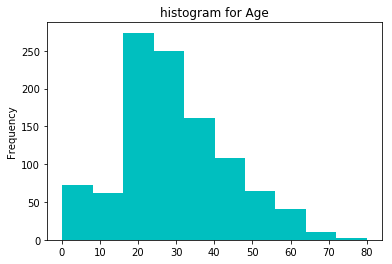

In [8]:
df.Age.plot(kind='hist', title='histogram for Age', color='c');

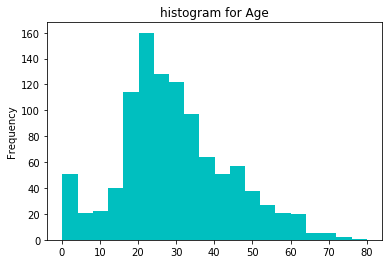

In [9]:
df.Age.plot(kind='hist', title='histogram for Age', color='c', bins=20);

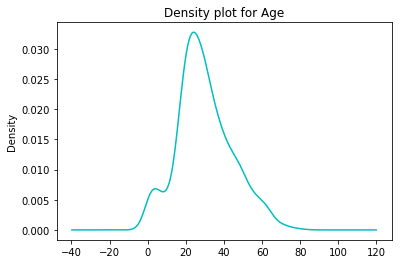

In [11]:
df.Age.plot(kind='kde', title='Density plot for Age', color='c');

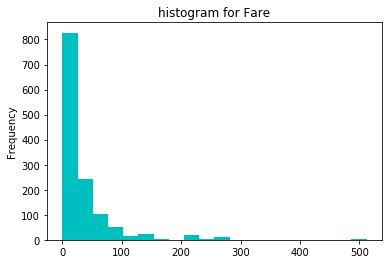

In [12]:
df.Fare.plot(kind='hist', title='histogram for Fare', color='c', bins=20);

In [14]:
print('skewness for age : {0:.2f}'.format(df.Age.skew()))
print('skewness for fare : {0:.2f}'.format(df.Fare.skew()))

skewness for age : 0.41
skewness for fare : 4.37


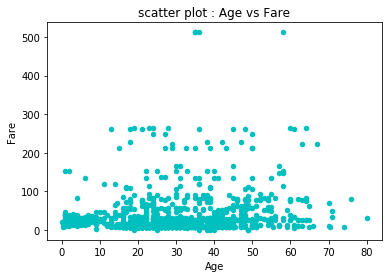

In [15]:
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare');

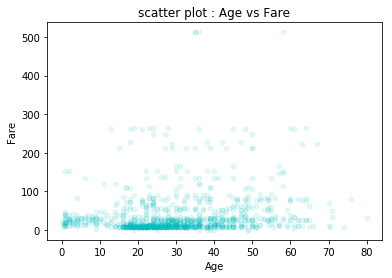

In [16]:
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare', alpha=0.1);

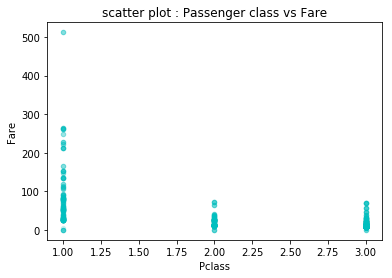

In [22]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='scatter plot : Passenger class vs Fare', alpha=0.15);

## Grouping and Aggregations

In [23]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [24]:
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [25]:
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [26]:
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [27]:
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Age,Fare
Pclass,,
1,39.0,87.508992
2,29.0,21.179196
3,24.0,13.302889


In [28]:
aggregations = {
    'Fare': {
        'mean_Fare': 'mean',
        'median_Fare': 'median',
        'max_Fare': max,
        'min_Fare': np.min
    },
    'Age': {
        'median_Age': 'median',
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)
    }
}

In [30]:
df.groupby(['Pclass']).agg(aggregations)

/anaconda3/lib/python3.5/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Age                                     Fare                       \
       min_Age range_Age median_Age max_Age median_Fare  mean_Fare  max_Fare   
Pclass                                                                         
1         0.92     79.08       39.0    80.0     60.0000  87.508992  512.3292   
2         0.67     69.33       29.0    70.0     15.0458  21.179196   73.5000   
3         0.17     73.83       24.0    74.0      8.0500  13.302889   69.5500   

                 
       min_Fare  
Pclass           
1           0.0  
2           0.0  
3           0.0

In [31]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

## Crosstabs

In [32]:
pd.crosstab(df.Sex,df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


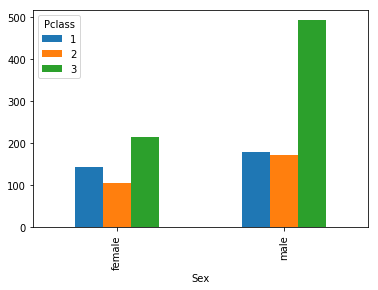

In [34]:
pd.crosstab(df.Sex,df.Pclass).plot(kind='bar');

## Pivots

In [39]:
df.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [36]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [37]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264
